## Importando as bibliotecas necessarias

In [85]:
# importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

import nltk
#from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('stopwords')

#### Carregando os dados de treinamento e teste

In [28]:
# Carregando os conjuntos de treinamento e teste
df_train = pd.read_csv('IMDB_train.csv')
df_test = pd.read_csv('IMDB_test.csv')

#### Mostrando as 10 primeiras linhas

In [29]:
df_train.head(10)

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...
5,Pos,when i first heard of contact the hype was ...
6,Pos,you ve got to love disney no matter what t...
7,Pos,with three pre to mid teen children and an a...
8,Pos,i hate to burst your bubble but after all t...
9,Pos,susan granger s review of osmosis jones ...


In [30]:
df_test.head(10)

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...
5,Pos,on june 30 1960 a self taught idealisti...
6,Pos,apparently director tony kaye had a major b...
7,Pos,one of my colleagues was surprised when i tol...
8,Pos,after bloody clashes and independence won l...
9,Pos,the american action film has been slowly drow...


In [31]:
# print data(feature)shape
df_train.shape

(1600, 2)

In [32]:
# print data(feature)shape
df_test.shape

(400, 2)

#### Mostrando o nome das colunas

In [33]:
df_train.columns

Index(['class', 'text'], dtype='object')

#### Renomeando o nome das colunas

In [34]:
df_train = df_train.rename(columns={'class': 'tipo', 'text': 'critica'})
df_test = df_test.rename(columns={'class': 'tipo', 'text': 'critica'})

#### Transformando o target "tipo" para 0 - Neg e 1 - Pos

In [35]:
# Importação de LabelEncoder
from sklearn import preprocessing

# criando labelEncoder
le = preprocessing.LabelEncoder()

df_train['tipo']=le.fit_transform(df_train.tipo)
df_test['tipo']=le.fit_transform(df_test.tipo)
df_train.head()

,tipo,critica
0,1,a common complaint amongst film critics is ...
1,1,whew this film oozes energy the kind of b...
2,1,steven spielberg s amistad which is bas...
3,1,he has spent his entire life in an awful litt...
4,1,being that it is a foreign language film with...


#### Mostrando as últimas linhas

In [36]:
df_train.tail()

,tipo,critica
1595,0,if anything stigmata should be taken as...
1596,0,john boorman s zardoz is a goofy cinemati...
1597,0,the kids in the hall are an acquired taste ...
1598,0,there was a time when john carpenter was a gr...
1599,0,two party guys bob their heads to haddaway s ...


#### Verifica se estao faltando valores

In [37]:
df_train.isna().sum()

tipo       0
critica    0
dtype: int64

In [38]:
df_test.isna().sum()

tipo       0
critica    0
dtype: int64

#### Mostrando como as variáveis ficaram após as transformações

In [39]:
critica, tipo = df_train.critica, df_train.tipo

In [40]:
print(critica)
print(tipo)

0        a common complaint amongst film critics is   ...
1        whew   this film oozes energy   the kind of b...
2        steven spielberg s   amistad     which is bas...
3        he has spent his entire life in an awful litt...
4        being that it is a foreign language film with...
                              ...                        
1595     if anything     stigmata   should be taken as...
1596     john boorman s   zardoz   is a goofy cinemati...
1597     the kids in the hall are an acquired taste   ...
1598     there was a time when john carpenter was a gr...
1599     two party guys bob their heads to haddaway s ...
Name: critica, Length: 1600, dtype: object
0       1
1       1
2       1
3       1
4       1
       ..
1595    0
1596    0
1597    0
1598    0
1599    0
Name: tipo, Length: 1600, dtype: int32


#### Funções de pré-processamento para retirar simbolos, pontuações e palavras desnecessárias

In [41]:
#funcao para remover stopwords 
def remove_stopwords(text):
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    text = pattern.sub('', text)
    return text


In [42]:
df_train['clean_text'] = df_train['critica'].apply(remove_stopwords)
df_test['clean_text'] = df_test['critica'].apply(remove_stopwords)
df_train.head()

,tipo,critica,clean_text
0,1,a common complaint amongst film critics is ...,common complaint amongst film critics literat...
1,1,whew this film oozes energy the kind of b...,whew film oozes energy kind breakneck h...
2,1,steven spielberg s amistad which is bas...,steven spielberg amistad based true story...
3,1,he has spent his entire life in an awful litt...,spent entire life awful little apartment ra...
4,1,being that it is a foreign language film with...,foreign language film known names select numb...


In [43]:
# Convertendo o texto para vetores numéricos
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(df_train['clean_text'])
test_matrix = vectorizer.transform(df_test['clean_text'])

print(test_matrix)

  (0, 1)	1
  (0, 16)	1
  (0, 33)	1
  (0, 106)	1
  (0, 203)	2
  (0, 265)	1
  (0, 314)	1
  (0, 380)	1
  (0, 468)	1
  (0, 556)	2
  (0, 686)	1
  (0, 706)	1
  (0, 712)	1
  (0, 731)	1
  (0, 1095)	1
  (0, 1111)	1
  (0, 1197)	1
  (0, 1236)	1
  (0, 1390)	1
  (0, 1572)	1
  (0, 1643)	1
  (0, 1644)	1
  (0, 1664)	1
  (0, 1704)	1
  (0, 1942)	1
  :	:
  (399, 32248)	1
  (399, 32250)	1
  (399, 32305)	1
  (399, 32326)	1
  (399, 32387)	1
  (399, 33006)	1
  (399, 33253)	2
  (399, 33265)	1
  (399, 33281)	1
  (399, 34115)	2
  (399, 34471)	2
  (399, 34502)	1
  (399, 34953)	1
  (399, 35124)	2
  (399, 35183)	1
  (399, 35235)	1
  (399, 35295)	1
  (399, 35353)	1
  (399, 35538)	3
  (399, 35631)	1
  (399, 35707)	1
  (399, 35709)	3
  (399, 35816)	1
  (399, 35822)	1
  (399, 35890)	2


<AxesSubplot: ylabel='tipo'>

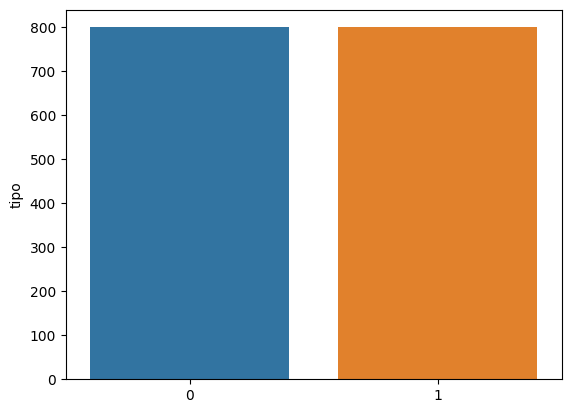

In [44]:
### Separando a variável meta e preditoras dos conjuntos de treinamento e teste

# Conjuntos de treinamento separados
X_train = np.asarray(train_matrix.todense())
y_train = df_train['tipo']

tipo_count_train = y_train.value_counts()
sns.barplot(x=tipo_count_train.index, y=tipo_count_train)

<AxesSubplot: ylabel='tipo'>

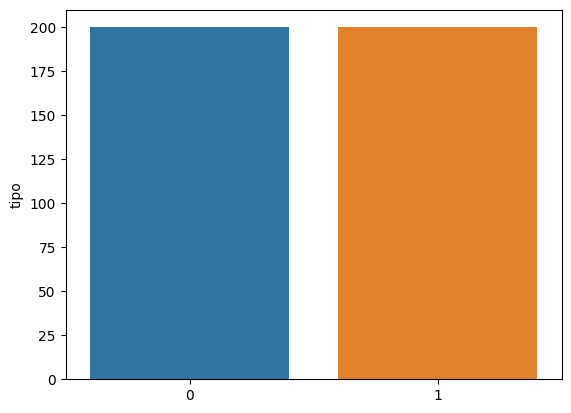

In [45]:
# Conjuntos de teste separados
X_test = np.asarray(test_matrix.todense())
y_test = df_test['tipo']
tipo_count_test = y_test.value_counts()
sns.barplot(x=tipo_count_test.index, y=tipo_count_test)

### Estatísticas e visualização dos dados

##### Contando o tamanho das criticas

In [46]:
sentence_lengths = [len(tokens) for tokens in df_train["clean_text"]]

In [47]:
sentence_lengths_test = [len(tokens) for tokens in df_test["clean_text"]]

#### Distribuição das criticas por quantidade de palavras

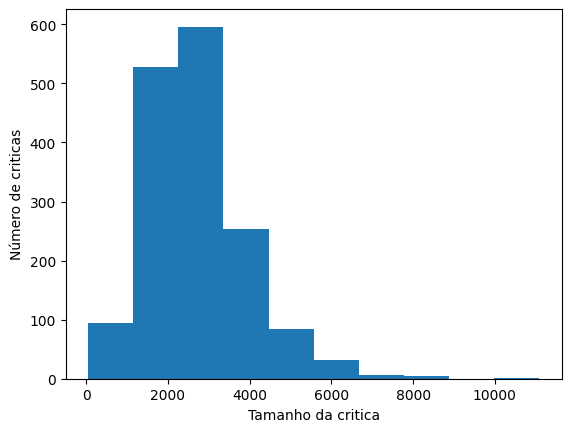

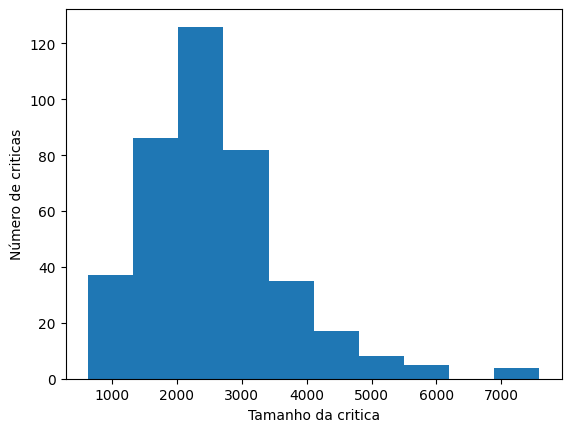

In [48]:
fig = plt.figure() 
plt.xlabel('Tamanho da critica')
plt.ylabel('Número de criticas')
plt.hist(sentence_lengths)
plt.show()

fig = plt.figure() 
plt.xlabel('Tamanho da critica')
plt.ylabel('Número de criticas')
plt.hist(sentence_lengths_test)
plt.show()

#### Gráfico das 10 palavras mais comuns nas críticas

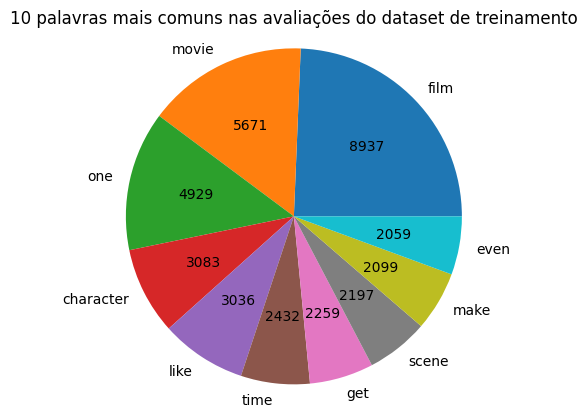

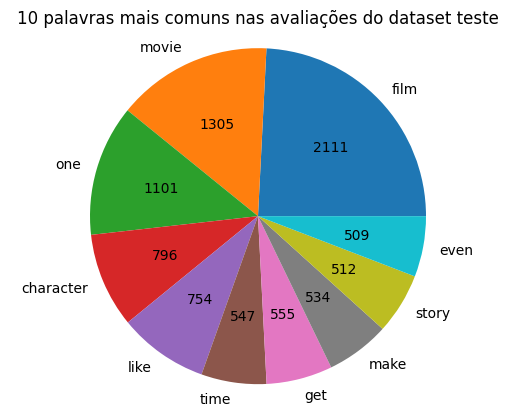

In [49]:
from collections import Counter
Counter(" ".join(df_train["clean_text"]).split()).most_common(10)

labels= 'film', 'movie', 'one', 'character', 'like', 'time', 'get', 'scene', 'make', 'even'
y= [ 8937, 5671, 4929, 3083, 3036, 2432, 2259, 2197, 2099, 2059]

fig1, ax1 = plt.subplots()

ax1.pie(y, labels= labels, autopct= lambda v:f"{sum(y)*v/100:.0f}") 
ax1.set_title("10 palavras mais comuns nas avaliações do dataset de treinamento")
ax1.axis('equal')

plt.show()


Counter(" ".join(df_test["clean_text"]).split()).most_common(10)

labels= 'film', 'movie', 'one', 'character', 'like', 'time', 'get','make', 'story', 'even'
y= [ 2111, 1305, 1101, 796, 754, 547, 555, 534, 512, 509]

fig1, ax1 = plt.subplots()

ax1.pie(y, labels= labels, autopct= lambda v:f"{sum(y)*v/100:.0f}") 
ax1.set_title("10 palavras mais comuns nas avaliações do dataset teste")
ax1.axis('equal')

plt.show()

### Nuvem de palavras

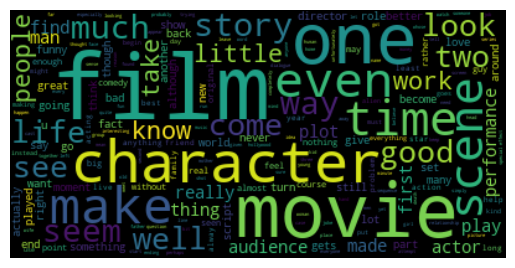

In [50]:
from wordcloud import WordCloud
textt = " ".join(critica for critica in df_train.clean_text)
wordcloud = WordCloud().generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

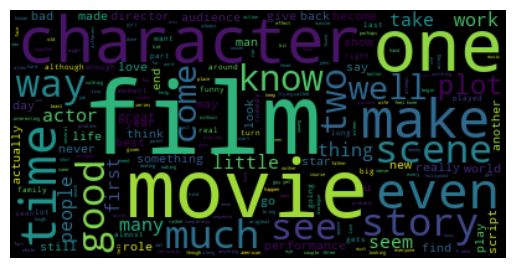

In [51]:
textt = " ".join(critica for critica in df_test.clean_text)
wordcloud = WordCloud().generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud12.png')
plt.show()

#### Treinamento e teste do algoritmo

------------- Algoritmo Naive Bayes---------------

Acurácia do algoritmo NB : 0.6375
Precision: 0.6291079812206573
Recall: 0.67
F1 Measure: 0.6489104116222759



c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


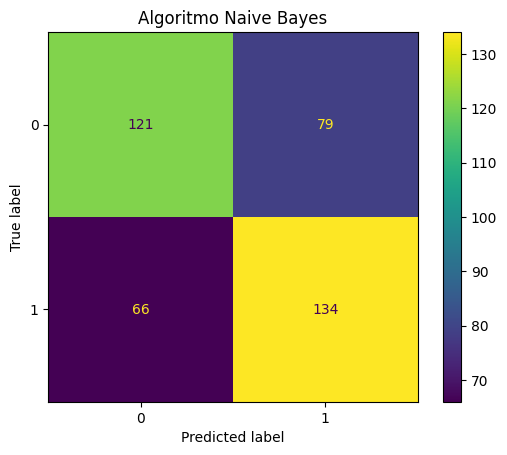

In [88]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#todense()
print("------------- Algoritmo Naive Bayes---------------\n")
## Apresenta a acurácia do modelo (NB)
print("Acurácia do algoritmo NB :",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Measure:",metrics.f1_score(y_test, y_pred))

print()


plot_confusion_matrix(model, X_test, y_test)  
plt.title("Algoritmo Naive Bayes")
plt.show()


------------- Algoritmo Random Forest--------------

Acurácia do algoritmo RF: 0.8025
Precision: 0.8497109826589595
Recall: 0.735
F1 Measure: 0.7882037533512065



c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


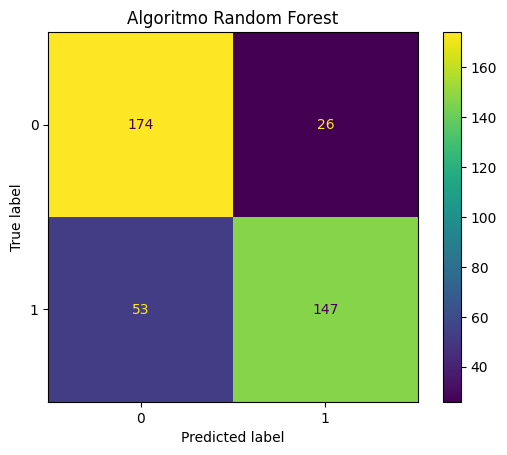

In [89]:
print("------------- Algoritmo Random Forest--------------\n")
# Random Forest
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

## Apresenta a acurácia do modelo (Random Forest)
print("Acurácia do algoritmo RF:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Measure:",metrics.f1_score(y_test, y_pred))

print()


plot_confusion_matrix(model, X_test, y_test)  
plt.title("Algoritmo Random Forest")
plt.show()

------------- Algoritmo KNeighbors---------------

Acurácia do algoritmo KNN : 0.58
Precision: 0.7580645161290323
Recall: 0.235
F1 Measure: 0.35877862595419846



c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


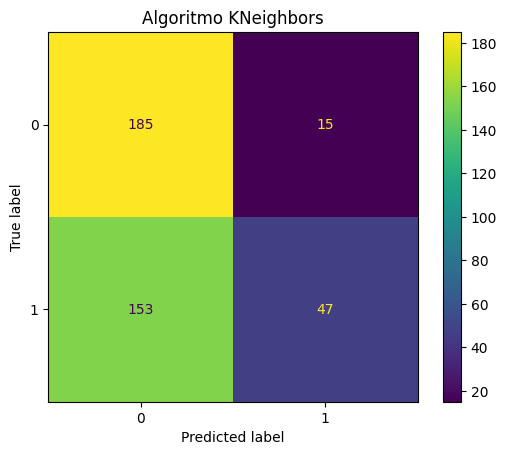

In [90]:
print("------------- Algoritmo KNeighbors---------------\n")
# KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

## Apresenta a acurácia do modelo (KNN)
print("Acurácia do algoritmo KNN :",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Measure:",metrics.f1_score(y_test, y_pred))

print()

plot_confusion_matrix(model, X_test, y_test)  
plt.title("Algoritmo KNeighbors")
plt.show()


------------- Algoritmo Logistic Regression---------------

Acurácia do algoritmo Logistic Regression : 0.825
Precision: 0.8532608695652174
Recall: 0.785
F1 Measure: 0.8177083333333334


c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


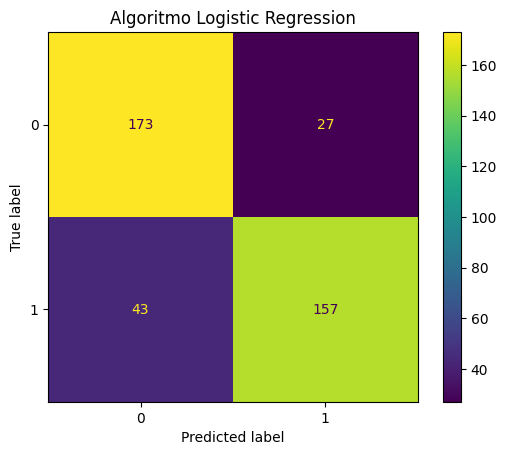

In [91]:
# Aplica o modelo LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("------------- Algoritmo Logistic Regression---------------\n")
## Apresenta a acurácia do modelo (KNN)
print("Acurácia do algoritmo Logistic Regression :",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Measure:",metrics.f1_score(y_test, y_pred))

plot_confusion_matrix(model, X_test, y_test)  
plt.title("Algoritmo Logistic Regression")
plt.show()